# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision


## Homework 2 - Image Classification and Foundation Models
---

### <a style='color:red'> Due Date: 18.12.2024 </a>

### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
#### READ THIS CAREFULLY
* Submission only in **pairs**.
* **No handwritten submissions**.
* You can choose your working environment:
    * You can work in a `Jupyter Notebook`, locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or online on <a href="https://colab.research.google.com/">Google Colab</a>
  * **Important**: Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime` $\rightarrow$  `Change Runtime Type` $\rightarrow$`GPU`.
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both also allow opening/editing Jupyter Notebooks.

* Make sure you submit your exercise according to the requirements in the <a href="https://moodle.technion.ac.il/pluginfile.php/1823033/mod_resource/content/2/Homework%20guidelines.pdf">"Homework submission guidelines"</a> file that appears in the course website (Moodle). 
* **The code should run both on CPU and GPU without manual modifications**, require no special preparation and run on every computer.
* **DON'T** submit the CIFAR-10 dataset in your submission, we have a local copy of it.
* **DON'T** submit the trained networks, but make sure to document every result you get.
* Be precise, we expect on point answers.
* Submission on the course website (Moodle).
* **Parts 1-2 are a bonus, part 3 on CLIP is mandatory.**

### <img src="https://img.icons8.com/dusk/64/000000/python.png" style="height:50px;display:inline"> Python Libraries
---

* `numpy`
* `matplotlib`
* `pytorch` (and `torchvision`)
* `opencv` (or `scikit-image`)
* `scikit-learn`
* Anything else you need (`PIL`, `os`, `pandas`, `csv`, `json`,...)

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Tasks
---
* In all tasks, you should document your process and results in a report file (which will be saved as `.pdf`). 
* You can reference your code in the report file, but no need for actual code in this file, the code is submitted in a seprate folder as explained above.

#### Part 1 - Classic Classifier - Bonus
---
In this part we are going to examine the performance of a classical classifier over images from the **Canadian Institute For Advanced Research (CIFAR-10)**  Dataset. 

* The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.
  * There is also CIFAR-100, with 100 classes.
* The classes are completely mutually exclusive. For example, there is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.
* <a href="https://www.cs.toronto.edu/~kriz/cifar.html">Official Site</a>


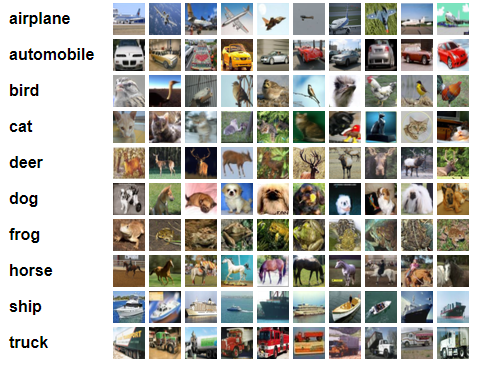


1. Load the CIFAR-10 training and test set with PyTorch (<a href="https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10">read more here</a>). Display 5 images from the training set with their labels as title.

2. Build a K-Nearest Neighbors (K-NN) classifier (hint: `sklearn.neighbors.KNeighborsClassifier`), with `n_neighbors=10`, to classify CIFAR-10: Load 10,000 samples from the training set and train the model. 

  **Note**: The model's input dimension should be : `(n_samples, n_features)`, Thus you need to convert each color channel to row representation and then concatenate the 3 color channels.

3. Load 1,000 samples from CIFAR-10 test set and check the performance of the K-NN classifier over these samples. What is the accuracy obtained? View the results using a confusion matrix(see <a href="https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62">here</a> for more information)

4. Compare the model's accuracy for different number of neighbors ($1 \leq K \leq 30$ ). Display the results in a graph of accuracy as function of $K$.

### Solution - Part 1

#### Section 1

In [99]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

SEED = 7

Load the CIFAR-10 training and test set

In [4]:
# Converts images to PyTorch tensors and normalize the values to be in the range [0, 1]
transform = transforms.Compose([
    transforms.ToTensor() 
])

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
# Convert datasets to tensors using DataLoader
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset))

# Extract full datasets as tensors
x_train, y_train = next(iter(train_loader))
x_test, y_test = next(iter(test_loader))

# Convert from [C, H, W] to [H, W, C]
x_train = x_train.permute(0, 2, 3, 1) # Rearrange dimensions
x_test = x_test.permute(0, 2, 3, 1) # Rearrange dimensions

In [7]:
print('train_dataset shape:', x_train.shape)
print('test_dataset shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

train_dataset shape: torch.Size([50000, 32, 32, 3])
test_dataset shape: torch.Size([10000, 32, 32, 3])
50000 train samples
10000 test samples


In [8]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Display 5 images from the training set

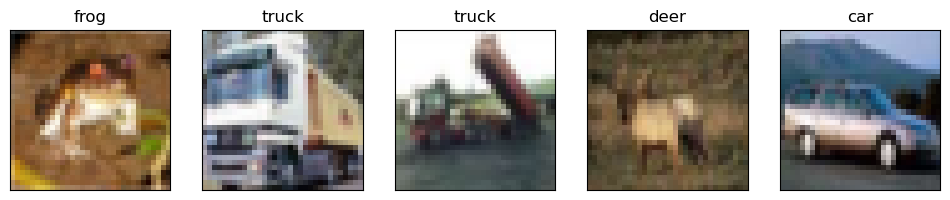

In [9]:
fig  = plt.figure(figsize=(12,12))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Convert from [C, H, W] to [H, W, C]
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i]])

#### Section 2

we would like to utilize the K-Nearest Neighbors (K-NN) classifier model that sklearn has to offer. To do that, the images must be flattened, and their dimension will be `3072`.

In [10]:
def reshape(X):
  return X.reshape(X.shape[0], -1)

x_train_flat = reshape(x_train)
x_test_flat = reshape(x_test)

# y_train_flat = y_train.flatten()
# y_test_flat = y_test.flatten()

In [11]:
assert (x_train_flat.shape == (50000, 3072))
assert (x_test_flat.shape == (10000, 3072))

Now, to classify CIFAR-10, we will Load 10,000 samples from the training set and train the model with `n_neighbors=10` in the KNN model.

In [12]:
from sklearn.utils import shuffle

n_samples = 10000

# Shuffle the dataset
x_train_shuffled, y_train_shuffled = shuffle(x_train_flat, y_train, random_state=SEED)

# take a random sample of 10000
x_train_sampled = x_train_shuffled[:n_samples]
y_train_sampled = y_train_shuffled[:n_samples]

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

n_neighbors=10

knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_clf.fit(x_train_sampled, y_train_sampled)

KNeighborsClassifier(n_neighbors=10)

#### Section 3

Now, we will check the performance of the K-NN classifier. We will check the accuracy and view the results using a confusion matrix.

In [14]:
x_test_sampled = x_test_flat[:n_samples]
y_test_sampled = y_test[:n_samples]

knn_predict = knn_clf.predict(x_test_sampled)
print('Accuracy for KNN is ',metrics.accuracy_score(knn_predict, y_test_sampled))

Accuracy for KNN is  0.299


In [15]:
y_proba = knn_clf.predict_proba(x_test_sampled)
y_pred = np.argmax(y_proba, axis=1)

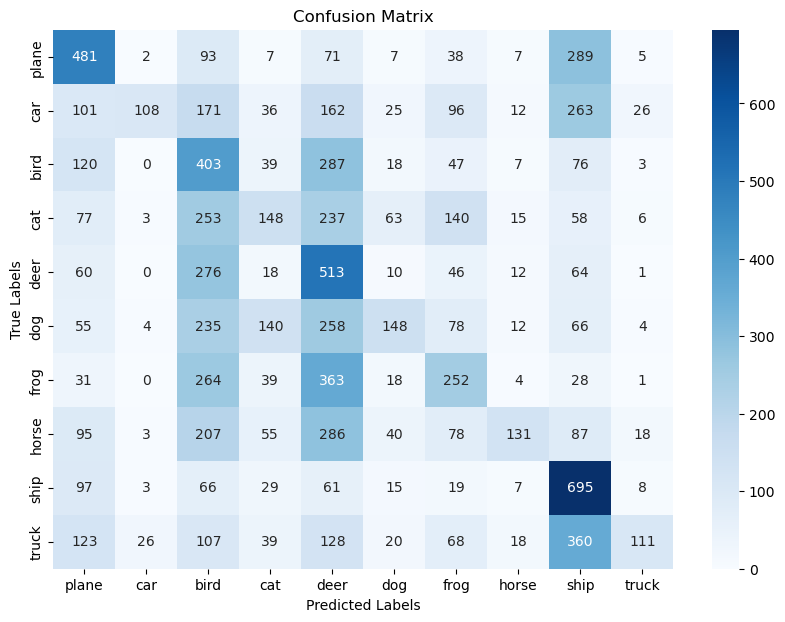

In [16]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_sampled, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Section 4

4. Compare the model's accuracy for different number of neighbors ($1 \leq K \leq 30$ ). Display the results in a graph of accuracy as function of $K$.

Now, we will compare the model's accuracy for different number of neighbors ($1 \leq K \leq 30$ ) and display the results in a graph of accuracy as function of $K$.

In [18]:
def accuracy_per_knn_model(n_neighbors, X_train, y_train, X_test, y_test):
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_clf.fit(X_train, y_train)
    knn_predict = knn_clf.predict(X_test)
    return metrics.accuracy_score(knn_predict, y_test_sampled)

In [19]:
K_lst = np.arange(1, 31)
accuracy_lst = [accuracy_per_knn_model(K, x_train_sampled, y_train_sampled, x_test_sampled, y_test_sampled) for K in K_lst]

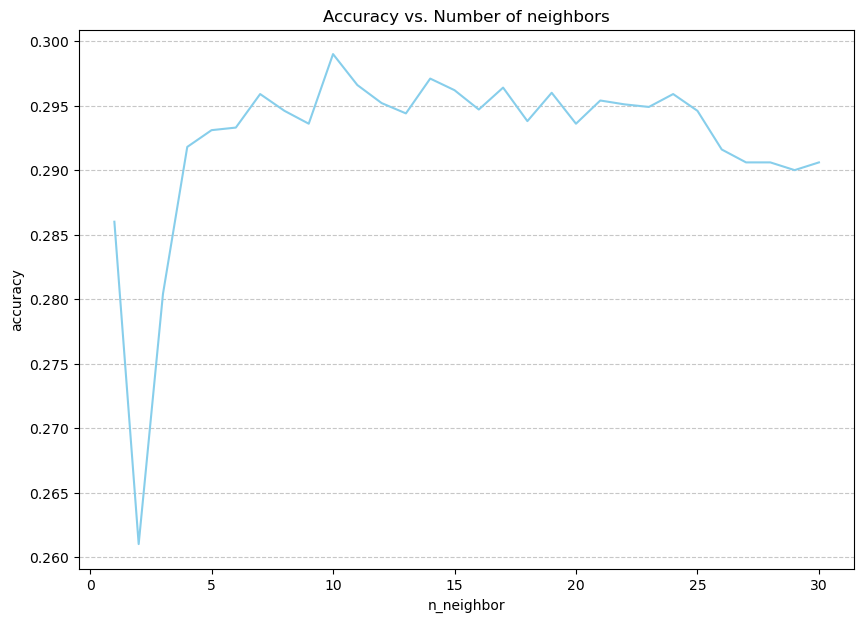

In [20]:
plt.figure(figsize=(10, 7))
plt.plot(K_lst, accuracy_lst, color='skyblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('n_neighbor')
plt.ylabel('accuracy')
plt.title('Accuracy vs. Number of neighbors')
plt.show()

#### Part 2 - Design and Build a CNN Classifier - Bonus
---
In this part you are going to design a deep convolutional neural network to classify CIFAR-10 dataset. 

1. Use the CNN from tutorials 3-4 , provided in the next block(`SvhnCnn()`) and train it on the CIFAR-10 dataset (**keep the architecture the same**) for the same number of **epochs** with the same learning rate (try to keep the batch size the same, but if you get memory errors, you can reduce it). What is the accuracy on the test set? What classes are most confusing for this model?
    * Your test accuracy from this section will be your **baseline** accuracy for sections 2-3.

In [21]:
# imports for the tutorial
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# pytorch
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [22]:
# define pre-processing steps on the images
# also called "data augementation" (only done for the train set)

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(brightness=63. / 255., saturation=[0.5, 1.5], contrast=[0.2, 1.8]),
    transforms.ToTensor(),  # (almost) Always use this!
    # SVHN dataset's:     Mean - R    Mean - G   Mean - B       STD - R     STD - G     STD - B
    transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614)),
])



In [24]:
class SvhnCNN(nn.Module):
    """CNN for the SVHN Datset"""

    def __init__(self):
        """CNN Builder."""
        super(SvhnCNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            # What are the dims after this layer? 
            # How many weights?
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),  # <- Why is this here?

            # Modified Conv Layer block 3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            # As we go deeper - use more channels!
        )

        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(8192, 512),  # <- How do we know it's 8192? Why 512 later?
            nn.ReLU(inplace=True),
            nn.Linear(512, 10)  # <- Why 10 here?
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

2. Design your own Convolutional Neural Network (CNN) to classify CIFAR-10. You can modify the network from section 1,but **you must get a better result than your baseline accuracy from section 1**.
    * You **need** to use one of the following in your CNN - Residual block, activation function <a href="https://pytorch.org/docs/stable/generated/torch.nn.PReLU.html">PReLU</a>, activation function Leaky ReLU, Group Normalization, <a href="https://towardsdatascience.com/intuitive-explanation-of-exponential-moving-average-2eb9693ea4dc">Exponential moving average (EMA)</a>.
      Explain the technique you have chosen.
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network.

  **Note:** 
    * The new network should perform better over the same task (i.e. using the same data with the same hyper-parameters. Change only the network architecture).
    * Students who reach the highest accuracy over the test set will receive **5 bonus points** for this exercise.


3. Train the classifier (preferably on a **GPU - use Colab for this part** if you don't have a GPU).
    * Describe the hyper-parameters of the model (batch size, epochs, learning rate....). How did you tune your model? Did you use a validation set to tune the model? (<a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">Separating to train/validation/test in PyTorch</a>)
    * What is the final accuracy on the test set?

### Solution - Part 2

#### Section 1

In [25]:
from tqdm import tqdm

In [30]:
# hyper‑parameters
batch_size = 128
learning_rate = 1e-4
epochs = 20

# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# dataloaders ‑ creating batches and shuffling the data
train_loader = torch.utils.data.DataLoader(
train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(
test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# device ‑ cpu or gpu?
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using {device}')

Files already downloaded and verified
Files already downloaded and verified
Using cuda


In [31]:
from torch.optim import Adam

# hyper‑parameters
batch_size = 128
learning_rate = 1e-4
epochs = 20

# Model
SvhnCNN = SvhnCNN().to(device)

# Criterion
criterion = nn.CrossEntropyLoss()

# Optimizer
optim = Adam(SvhnCNN.parameters(), lr=learning_rate)

print(f"Number of parameters: {sum(param.numel() for param in SvhnCNN.parameters() if param.requires_grad)}")

Number of parameters: 4482058


In [32]:
from torch.optim import Adam
import time

# Enable cuDNN benchmark for faster computations with consistent input sizes
torch.backends.cudnn.benchmark = True

total_time = time.time()

for epoch in range(1, epochs + 1):
    SvhnCNN.train()
    running_loss = 0.0
    epoch_start_time = time.time()

    # Progress bar for training
    with tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch}/{epochs}", colour="green") as pbar:
        for i, (batch_images, batch_labels) in pbar:
            # Move data to the correct device
            batch_images, batch_labels = batch_images.to(device), batch_labels.to(device)

            # Forward pass
            outputs = SvhnCNN(batch_images)
            loss = criterion(outputs, batch_labels)

            # Backward pass and optimization
            optim.zero_grad()
            loss.backward()
            optim.step()

            # Update metrics
            running_loss += loss.item()

            # Update progress bar with running metrics
            current_loss = running_loss / (i + 1)
            pbar.set_postfix({
                "loss": f"{current_loss:.4f}"
            })

    # Epoch summary
    epoch_loss = running_loss / len(train_loader)
    epoch_time = time.time() - epoch_start_time
    print(f"Epoch {epoch}/{epochs} - {int(epoch_time)}s - loss: {epoch_loss:.4f}")

training_time = time.time()-total_time
print(f"Total Training time {int(training_time)}s")

print("==> Finished Training!")

Epoch 1/20: 100%|██████████| 391/391 [00:18<00:00, 21.16it/s, loss=1.8307]


Epoch 1/20 - 45s - loss: 1.8307


Epoch 2/20: 100%|██████████| 391/391 [00:17<00:00, 22.65it/s, loss=1.5176]


Epoch 2/20 - 26s - loss: 1.5176


Epoch 3/20: 100%|██████████| 391/391 [00:20<00:00, 19.46it/s, loss=1.3832]


Epoch 3/20 - 29s - loss: 1.3832


Epoch 4/20: 100%|██████████| 391/391 [00:18<00:00, 21.07it/s, loss=1.2774]


Epoch 4/20 - 31s - loss: 1.2774


Epoch 5/20: 100%|██████████| 391/391 [00:17<00:00, 22.96it/s, loss=1.1843]


Epoch 5/20 - 26s - loss: 1.1843


Epoch 6/20: 100%|██████████| 391/391 [00:17<00:00, 22.73it/s, loss=1.1171]


Epoch 6/20 - 26s - loss: 1.1171


Epoch 7/20: 100%|██████████| 391/391 [00:17<00:00, 22.21it/s, loss=1.0640]


Epoch 7/20 - 31s - loss: 1.0640


Epoch 8/20: 100%|██████████| 391/391 [00:17<00:00, 22.16it/s, loss=1.0182]


Epoch 8/20 - 26s - loss: 1.0182


Epoch 9/20: 100%|██████████| 391/391 [00:18<00:00, 21.29it/s, loss=0.9713]


Epoch 9/20 - 28s - loss: 0.9713


Epoch 10/20: 100%|██████████| 391/391 [00:17<00:00, 22.56it/s, loss=0.9423]


Epoch 10/20 - 27s - loss: 0.9423


Epoch 11/20: 100%|██████████| 391/391 [00:17<00:00, 22.64it/s, loss=0.8993]


Epoch 11/20 - 26s - loss: 0.8993


Epoch 12/20: 100%|██████████| 391/391 [00:17<00:00, 21.80it/s, loss=0.8714]


Epoch 12/20 - 27s - loss: 0.8714


Epoch 13/20: 100%|██████████| 391/391 [00:17<00:00, 22.44it/s, loss=0.8403]


Epoch 13/20 - 26s - loss: 0.8403


Epoch 14/20: 100%|██████████| 391/391 [00:17<00:00, 22.54it/s, loss=0.8086]


Epoch 14/20 - 27s - loss: 0.8086


Epoch 15/20: 100%|██████████| 391/391 [00:19<00:00, 20.10it/s, loss=0.7867]


Epoch 15/20 - 29s - loss: 0.7867


Epoch 16/20: 100%|██████████| 391/391 [00:17<00:00, 21.91it/s, loss=0.7590]


Epoch 16/20 - 29s - loss: 0.7590


Epoch 17/20: 100%|██████████| 391/391 [00:18<00:00, 21.62it/s, loss=0.7328]


Epoch 17/20 - 27s - loss: 0.7328


Epoch 18/20: 100%|██████████| 391/391 [00:18<00:00, 21.36it/s, loss=0.7089]


Epoch 18/20 - 28s - loss: 0.7089


Epoch 19/20: 100%|██████████| 391/391 [00:17<00:00, 22.64it/s, loss=0.6893]


Epoch 19/20 - 27s - loss: 0.6893


Epoch 20/20: 100%|██████████| 391/391 [00:17<00:00, 21.91it/s, loss=0.6691]

Epoch 20/20 - 27s - loss: 0.6691
Total Training time 576s
==> Finished Training!


In [33]:
# SvhnCNN.train()
# for epoch in range(epochs):
#     loss = 0
#     for i, (batch_images, batch_labels) in tqdm(enumerate(train_loader), desc='batch', leave=False):
#         batch_logits = SvhnCNN(batch_images)
#         loss = criterion(batch_logits, batch_labels)
#         optim.zero_grad()
#         loss.backward()
#         optim.step()
#
#         if (i+1) % 100 == 0:
#             print('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f'
#                    %(epoch+1, epochs, i+1,
#                      len(train_dataset)//batch_size, loss.data))
#
        

In [35]:
def accuracy(model, loader, device):
    model.eval()

    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for batch_images, batch_labels in loader:
            batch_images = batch_images.to(device)
            batch_labels = batch_labels.to(device)

            batch_logits = model(batch_images)
            _, predicted = torch.max(batch_logits.data, 1)

            total_samples += batch_labels.size(0)
            total_correct += (predicted == batch_labels).sum().item()
    accuracy = (total_correct / total_samples)*100
    return accuracy

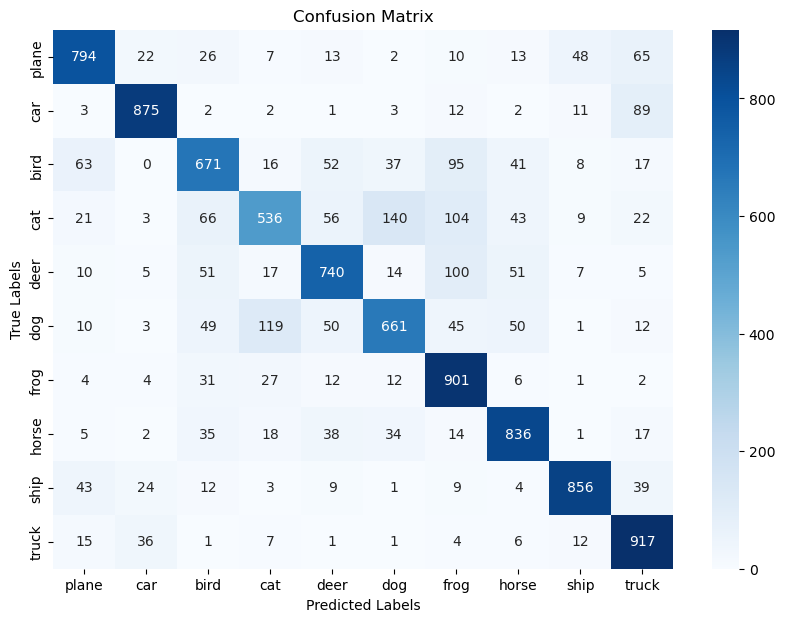

array([[794,  22,  26,   7,  13,   2,  10,  13,  48,  65],
       [  3, 875,   2,   2,   1,   3,  12,   2,  11,  89],
       [ 63,   0, 671,  16,  52,  37,  95,  41,   8,  17],
       [ 21,   3,  66, 536,  56, 140, 104,  43,   9,  22],
       [ 10,   5,  51,  17, 740,  14, 100,  51,   7,   5],
       [ 10,   3,  49, 119,  50, 661,  45,  50,   1,  12],
       [  4,   4,  31,  27,  12,  12, 901,   6,   1,   2],
       [  5,   2,  35,  18,  38,  34,  14, 836,   1,  17],
       [ 43,  24,  12,   3,   9,   1,   9,   4, 856,  39],
       [ 15,  36,   1,   7,   1,   1,   4,   6,  12, 917]], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def compute_confusion_matrix(model, dataloader, device=None):
    """
    Computes and displays a confusion matrix for a model and DataLoader.

    Args:
        model (torch.nn.Module): The trained model.
        dataloader (torch.utils.data.DataLoader): DataLoader with test/validation data.
        device (torch.device, optional): Device to perform computations (CPU/GPU). Defaults to auto-detect.

    Returns:
        confusion_matrix (numpy.ndarray): The computed confusion matrix.
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.to(device)
    model.eval()  # Set the model to evaluation mode

    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            # Get the predicted class (assuming the model outputs raw logits or probabilities)
            _, preds = torch.max(outputs, 1)  # Choose the class with the highest score

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return cm


compute_confusion_matrix(SvhnCNN, test_loader, device)

In [36]:
accuracy(SvhnCNN, test_loader, device)

77.86999999999999

In [53]:
class CIFAR10CNN(nn.Module):
    """Improved CNN for CIFAR-10."""

    def __init__(self):
        super(CIFAR10CNN, self).__init__()

        # Convolutional Layers
        self.conv_layer = nn.Sequential(
            # Block 1
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Reduce spatial dimensions by 2x

            # Block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 4 (Optional for deeper networks)
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # Fully Connected Layers
        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.3),  # Prevent overfitting
            nn.Linear(512 * 2 * 2, 512),  # Assuming input size is 32x32
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(512, 10)  # 10 output classes for CIFAR-10
        )

    def forward(self, x):
        x = self.conv_layer(x)  # Pass through convolutional layers
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc_layer(x)  # Pass through fully connected layers
        return x


In [37]:
class CNN_v3(nn.Module):
    """CNN for the SVHN Datset"""

    def __init__(self):
        """CNN Builder."""
        super(CNN_v3, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding="same"),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding="same"),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding="same"),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding="same"),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.3),

            # Conv Layer block 3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding="same"),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding="same"),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.4)
        )

        self.fc_layer = nn.Sequential(
            nn.Linear(128 * 4 * 4, 128), # Adjust input size based on input image dimensions
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(128),
            nn.Dropout(p=0.5),
            nn.Linear(128, 10) # Output layer with 10 classes (softmax handled separately)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [54]:
from torch.optim import Adam

# hyper‑parameters
batch_size = 128
learning_rate = 1e-4
epochs = 20

# Model
# model_v3 = CNN_v3().to(device)
model_v3 =CIFAR10CNN().to(device)

# Criterion
criterion = nn.CrossEntropyLoss()

# Optimizer
optim = Adam(model_v3.parameters(), lr=learning_rate)

print(f"Number of parameters: {sum(param.numel() for param in model_v3.parameters() if param.requires_grad)}")

Number of parameters: 5743434


In [55]:
from torch.optim import Adam
import time

# Enable cuDNN benchmark for faster computations with consistent input sizes
torch.backends.cudnn.benchmark = True

total_time = time.time()

for epoch in range(1, epochs + 1):
    model_v3.train()
    running_loss = 0.0
    epoch_start_time = time.time()

    # Progress bar for training
    with tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch}/{epochs}", colour="green") as pbar:
        for i, (batch_images, batch_labels) in pbar:
            # Move data to the correct device
            batch_images, batch_labels = batch_images.to(device), batch_labels.to(device)

            # Forward pass
            outputs = model_v3(batch_images)
            loss = criterion(outputs, batch_labels)

            # Backward pass and optimization
            optim.zero_grad()
            loss.backward()
            optim.step()

            # Update metrics
            running_loss += loss.item()

            # Update progress bar with running metrics
            current_loss = running_loss / (i + 1)
            pbar.set_postfix({
                "loss": f"{current_loss:.4f}"
            })

    # Epoch summary
    epoch_loss = running_loss / len(train_loader)
    epoch_time = time.time() - epoch_start_time
    print(f"Epoch {epoch}/{epochs} - {int(epoch_time)}s - loss: {epoch_loss:.4f}")

training_time = time.time()-total_time
print(f"Total Training time {int(training_time)}s")

print("==> Finished Training!")

Epoch 1/20: 100%|██████████| 391/391 [00:21<00:00, 17.78it/s, loss=1.5851]


Epoch 1/20 - 31s - loss: 1.5851


Epoch 2/20: 100%|██████████| 391/391 [00:18<00:00, 20.60it/s, loss=1.1178]


Epoch 2/20 - 28s - loss: 1.1178


Epoch 3/20: 100%|██████████| 391/391 [00:19<00:00, 20.32it/s, loss=0.8985]


Epoch 3/20 - 29s - loss: 0.8985


Epoch 4/20: 100%|██████████| 391/391 [00:18<00:00, 21.21it/s, loss=0.7762]


Epoch 4/20 - 28s - loss: 0.7762


Epoch 5/20: 100%|██████████| 391/391 [00:17<00:00, 22.66it/s, loss=0.6933]


Epoch 5/20 - 30s - loss: 0.6933


Epoch 6/20: 100%|██████████| 391/391 [00:20<00:00, 19.52it/s, loss=0.6178]


Epoch 6/20 - 29s - loss: 0.6178


Epoch 7/20: 100%|██████████| 391/391 [00:18<00:00, 21.26it/s, loss=0.5708]


Epoch 7/20 - 28s - loss: 0.5708


Epoch 8/20: 100%|██████████| 391/391 [00:18<00:00, 21.21it/s, loss=0.5218]


Epoch 8/20 - 28s - loss: 0.5218


Epoch 9/20: 100%|██████████| 391/391 [00:17<00:00, 21.97it/s, loss=0.4839]


Epoch 9/20 - 28s - loss: 0.4839


Epoch 10/20: 100%|██████████| 391/391 [00:18<00:00, 21.46it/s, loss=0.4473]


Epoch 10/20 - 28s - loss: 0.4473


Epoch 11/20: 100%|██████████| 391/391 [00:19<00:00, 20.25it/s, loss=0.4132]


Epoch 11/20 - 29s - loss: 0.4132


Epoch 12/20: 100%|██████████| 391/391 [00:19<00:00, 20.37it/s, loss=0.3905]


Epoch 12/20 - 29s - loss: 0.3905


Epoch 13/20: 100%|██████████| 391/391 [00:18<00:00, 20.59it/s, loss=0.3597]


Epoch 13/20 - 29s - loss: 0.3597


Epoch 14/20: 100%|██████████| 391/391 [00:19<00:00, 19.82it/s, loss=0.3387]


Epoch 14/20 - 30s - loss: 0.3387


Epoch 15/20: 100%|██████████| 391/391 [00:18<00:00, 21.26it/s, loss=0.3177]


Epoch 15/20 - 28s - loss: 0.3177


Epoch 16/20: 100%|██████████| 391/391 [00:18<00:00, 21.00it/s, loss=0.3009]


Epoch 16/20 - 28s - loss: 0.3009


Epoch 17/20: 100%|██████████| 391/391 [00:18<00:00, 21.05it/s, loss=0.2774]


Epoch 17/20 - 28s - loss: 0.2774


Epoch 18/20: 100%|██████████| 391/391 [00:19<00:00, 20.08it/s, loss=0.2693]


Epoch 18/20 - 29s - loss: 0.2693


Epoch 19/20: 100%|██████████| 391/391 [00:18<00:00, 20.83it/s, loss=0.2473]


Epoch 19/20 - 29s - loss: 0.2473


Epoch 20/20: 100%|██████████| 391/391 [00:19<00:00, 20.43it/s, loss=0.2341]

Epoch 20/20 - 29s - loss: 0.2341
Total Training time 583s
==> Finished Training!


In [56]:
accuracy(model_v3, test_loader, device)

84.78

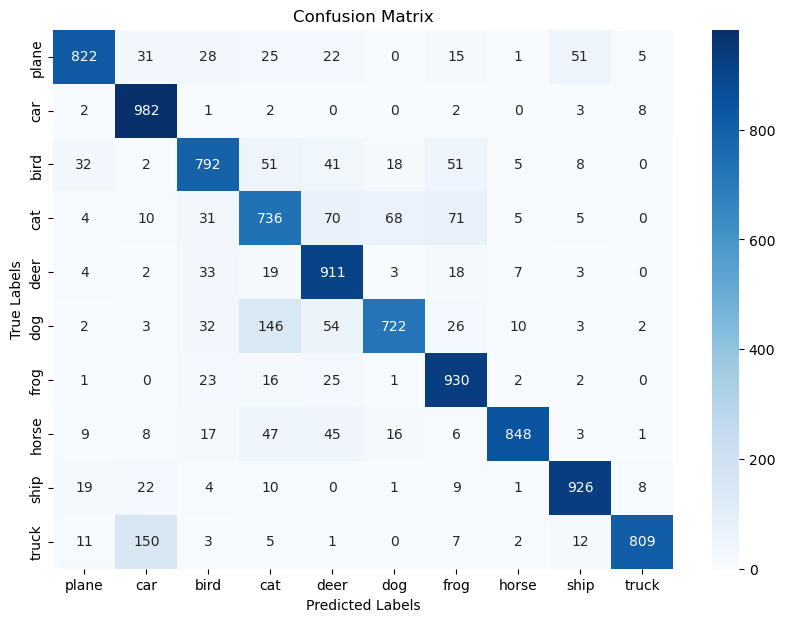

array([[822,  31,  28,  25,  22,   0,  15,   1,  51,   5],
       [  2, 982,   1,   2,   0,   0,   2,   0,   3,   8],
       [ 32,   2, 792,  51,  41,  18,  51,   5,   8,   0],
       [  4,  10,  31, 736,  70,  68,  71,   5,   5,   0],
       [  4,   2,  33,  19, 911,   3,  18,   7,   3,   0],
       [  2,   3,  32, 146,  54, 722,  26,  10,   3,   2],
       [  1,   0,  23,  16,  25,   1, 930,   2,   2,   0],
       [  9,   8,  17,  47,  45,  16,   6, 848,   3,   1],
       [ 19,  22,   4,  10,   0,   1,   9,   1, 926,   8],
       [ 11, 150,   3,   5,   1,   0,   7,   2,  12, 809]], dtype=int64)

In [58]:
compute_confusion_matrix(model_v3, test_loader, device)


#### Part 3 - Foundation Models - Mandatory
---
As we've seen, CNNs are very powerful models for image classification, However, they also require a lot of training data and a lot of training time. In this part we will use CLIP, a new model from OpenAI, which is a foundation model for vision and language. CLIP is a neural network trained on a variety of (image, text) pairs. It can be instructed in natural language to predict the most relevant text snippet, given an image, without directly optimizing for the task, similarly it can be asked to predict the most relevant image, given some text. CLIP has been trained on 400 million (image, text) pairs ([read more here](https://openai.com/blog/clip/)).

The following exercise can be done both locally on cpu, and in GPU. consider the following: if it is done on CPU, it will take a long time to run, and that's ok.

We'll first start by installing the CLIP model and the necessary packages:

In [57]:
!pip install git+https://github.com/openai/CLIP.git
!pip install seaborn

  Cloning https://github.com/openai/CLIP.git to c:\users\bmessica\appdata\local\temp\pip-req-build-il11xn4z
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   --------------------------- ------------ 4.2/6.2 MB 20.9 MB/s eta 0:00:01
   ---------------------------------------- 6.2/6.2 MB 23.7 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369570 sha256=4958b06ed76db3c1803675698fa3327ad8ec6bacfe5554463b5cf80c7a0310be
  Stored in directory: C:\Users\bmessica\AppData\Local\Temp\pip-ephem-wheel-cache-5cvfuneu\wheels\35\3e\df\3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled symp

  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\bmessica\AppData\Local\Temp\pip-req-build-il11xn4z'


Now that we've installed the model, we can load it and use it to classify images. We'll start by loading the model.

In [4]:
import torch
import clip
from PIL import Image

def load_image(image_path):
    """ Load an image from a file path. """
    image = Image.open(image_path).convert("RGB")
    return image
#load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14@336px", device=device)


you can find documentation for this model in the following github: https://github.com/openai/CLIP

1. Load the provided images under the directory data/clip_images. compute their embeddings, and project them to the embedding space using T-SNE(An algorithm for dimensionality reduction)(<a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">read more here</a>) . Plot the images in the embedding space. Do you see any clusters? What do you think these clusters represent?

In [35]:
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


def get_jpg_files(folder_path):
    """
    Returns a list of all .jpg file paths in the specified folder.

    Args:
        folder_path (str): Path to the folder.

    Returns:
        list: List of paths to .jpg files.
    """
    if not os.path.isdir(folder_path):
        raise ValueError(f"The provided path '{folder_path}' is not a valid directory.")

    jpg_files = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(".jpg"):  # Case-insensitive match for .jpg
                jpg_files.append(os.path.join(root, file))
    return jpg_files

def extract_features(images_path, model, preprocess, device):
    """
    Extract features from images using the CLIP model.

    Args:
        images (list): List of PIL.Image objects.
        model (torch.nn.Module): CLIP model.
        preprocess (torchvision.transforms.Compose): Preprocessing pipeline for CLIP.
        device (torch.device): Device to run the model on.

    Returns:
        torch.Tensor: Extracted features as a tensor.
    """
    features = []
    for path in images_path:
        img_tensor = preprocess(load_image(path)).unsqueeze(0).to(device)
        with torch.no_grad():
            feature = model.encode_image(img_tensor)
            features.append(feature.cpu())
    return torch.cat(features, dim=0)



def visualize_tsne(features, image_paths):
    """
    Visualize features using T-SNE.

    Args:
        features (torch.Tensor): Feature tensor of shape (N, D), where N is the number of images and D is the feature dimension.
        image_paths (list): List of image file paths for labeling.

    Returns:
        None
    """
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    image_features_np = features.cpu().numpy()
    features_2d = tsne.fit_transform(image_features_np)

    # Plot the results
    plt.figure(figsize=(10, 8))
    plt.scatter(features_2d[:, 0], features_2d[:, 1], alpha=0.7)

    plt.title("T-SNE Visualization of CLIP Features")
    plt.xlabel("T-SNE Dimension 1")
    plt.ylabel("T-SNE Dimension 2")
    plt.show()


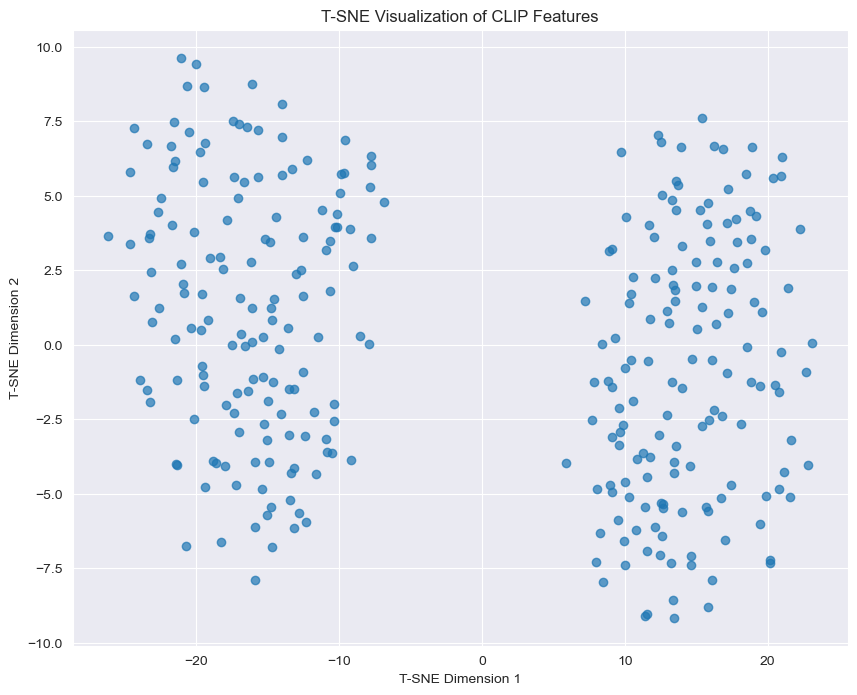

In [75]:
# Load images
folder_path = "data/clip_images"
jpg_files = get_jpg_files(folder_path)

# Extract features
all_im_features = extract_features(jpg_files, model, preprocess, device)

# Visualize using T-SNE
visualize_tsne(image_features, jpg_files)

2. Load the provided image under the directory data/clip_images, named alfie.jpeg, and display it. Compute its embeddings using the CLIP model. find the top 5 most similar images (according to the cosine similarity between their embeddings). Display the result in as a row of images. Do you think the results make sense? Why?

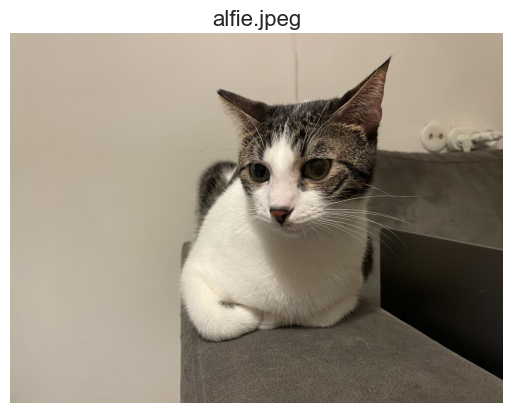

IndexError: index 5 is out of bounds for axis 0 with size 5

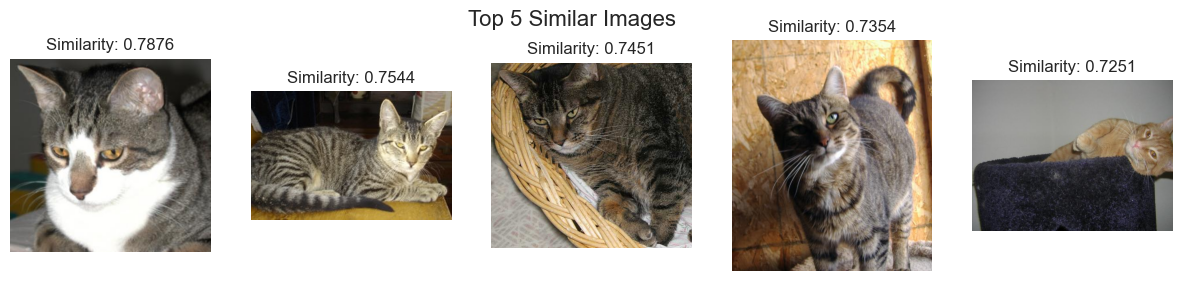

In [113]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)



# load and get the required image feature
im_path = "data/clip_images/alfie.jpeg"
im = load_image(im_path)
plt.imshow(im)
plt.title ('alfie.jpeg', fontsize=16)
plt.axis('off')  # Turn off axis numbers
plt.show()

img_tensor = preprocess(im).unsqueeze(0).to(device)
with torch.no_grad():
    query_features = model.encode_image(img_tensor)
    query_features = query_features.cpu().numpy()

# Calculate similarities
similarities = []
for idx in range(len(jpg_files)):
    img_features = features[idx]
    similarity = cosine_similarity(query_features, img_features)
    similarities.append((jpg_files[idx], similarity))

# Sort similarities in descending order based on similarity score
sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)

# Print the results
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle("Top 5 Similar Images", fontsize=16)
axes = axes.flatten()

for idx, (path, similarity_score) in enumerate(sorted_similarities):
    img = load_image(path)
    axes[idx].imshow(img)
    axes[idx].set_title(f"Similarity: {similarity_score.item():.4f}")
    axes[idx].axis('off')

# Remove the unused subplot
if len(sorted_similarities) < 6:
    fig.delaxes(axes[5])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


Now that we've seen the power of CLIP Embeddings, lets try and use the textual embeddings to classify images.

3. in the data provided with the exercise, look at the directory data/clip_images/test. 

    3.1 Parse the labels in the path data/clip_images/test/labels.txt
    
    3.2 Read the images in data/clip_images/test
    
    3.3 classify each image to one of the classes, Dogs and Cats
    
    3.4 Compute the accuracy of the classification, given the labels in labels.txt, and plot a confusion matrix.

in this exercise, you must use the CLIP Textual embeddings, as shown in the tutorial.  What are the strengths of this approach? What are the weaknesses? If the folder also contained images that are not cats, nor dogs,  how would you classify those images? note - the wanted class in this case would be "Other".

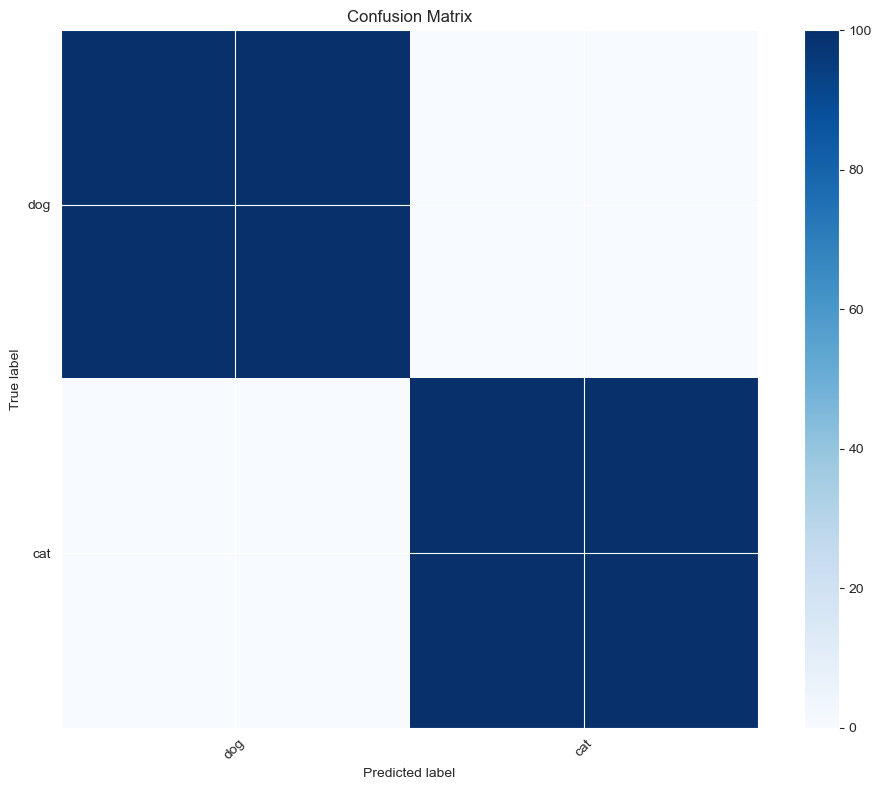

In [132]:
def plot_confusion_matrix(cm, class_labels):
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


file_name = 'data/clip_images/test/labels.txt'
parsed_labels = []
true_labels = []
with open(file_name, 'r') as file:
    for line in file:
        name, label = line.strip().split(': ')
        parsed_labels.append((name, label))
        true_labels.append(label)

# get images paths
jpg_files = get_jpg_files('data/clip_images/test')
# define the labels
class_labels = ["dog", "cat"]
text = clip.tokenize(class_labels).to(device)

predicted_labels = []
for file_name, correct_label in parsed_labels:
    image = preprocess(load_image('data/clip_images/test/'+ file_name)).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text)

        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)
        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        predicted_label = class_labels[similarity.argmax().item()]
        predicted_labels.append(predicted_label)

true_prediction = (true_labels == predicted_labels)
print('the accuracy of the model on the test is: ' + str(true_prediction *100) + '%')

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=class_labels)
plot_confusion_matrix(cm, class_labels)




4. Given the image under the path B, write a function that given an image of cats, returns the number of how many cats are in the image